# The Titanic Prediction Challenge: Neural Networks or Machine Learning?

This exercise aims to evaluate and compare the performance of Neural Networks and traditional Machine Learning models, specifically Random Forest Classifier and XGBoost, on the Titanic dataset. The goal is to predict passenger survival based on features such as age, sex, ticket class, and other relevant attributes. By implementing and analyzing these models, the exercise seeks to determine which approach offers superior predictive accuracy and efficiency when applied to this dataset. The results provide insights into the strengths and limitations of Neural Networks versus established Machine Learning algorithms for binary classification tasks.

In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for preprocessing, model evaluation, and machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

# XGBoost library
from xgboost import XGBClassifier

# TensorFlow and Keras libraries for Neural Network implementation
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [2]:
# Load the Titanic dataset into a pandas DataFrame
titanic = pd.read_csv("Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Calculate and display the mean of all numeric columns in the Titanic dataset.
# The `numeric_only=True` parameter ensures that only numeric columns are included in the calculation.

titanic.mean(numeric_only=True)

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# function to extract the initials from passenger names.
def initials(name):
    return name.str.split().apply(lambda x: ''.join([n[0] for n in x]))
    
print(initials(titanic['Name']))

0         BMOH
1      CMJB(BT
2          HML
3      FMJH(MP
4         AMWH
        ...   
886        MRJ
887       GMME
888      JMCH"
889       BMKH
890        DMP
Name: Name, Length: 891, dtype: object


In [9]:
# Fill missing values in the 'Cabin' column of the Titanic dataset with the initials of the passenger's name.
# This uses the initials derived from the 'Name' column as a substitute for missing cabin data.
titanic['Cabin'] = titanic['Cabin'].fillna(initials(titanic['Name']))

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,BMOH,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,HML,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,AMWH,S


In [11]:
#check if there are null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [12]:
# Fill missing values in the 'Age' column with the column's mean value.
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [13]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [14]:
titanic['Sex']= titanic['Sex'].str.capitalize()

In [15]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,BMOH,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,HML,S


In [16]:
# show the count of passengers based on 'Sex' and quay they Embarked on the journey.
df = pd.crosstab(titanic.Sex, titanic.Embarked)

# Add a row 'Total' that contains the sum of each column (embarked categories) across genders.
df.loc['Total'] = df.sum(numeric_only=True, axis=0)

# Add a column 'Total' that contains the sum of each row (gender categories) across embarkation points.
df.loc[:, 'Total'] = df.sum(numeric_only=True, axis=1)

print(df)

Embarked    C   Q    S  Total
Sex                          
Female     73  36  203    312
Male       95  41  441    577
Total     168  77  644    889


Female Passengers:

	•	73 females boarded from Cherbourg port.
	•	36 females boarded from Queenstown (now known as Cobh, Ireland).
	•	203 females boarded from Southampton port.
	•	The total number of female passengers is 312.

Male Passengers:

	•	95 males boarded from Cherbourg.
	•	41 males boarded from Queenstown.
	•	441 males boarded from Southampton.
	•	The total number of male passengers is 577.

Total Passengers:

	•	168 passengers boarded from Cherbourg.
	•	77 passengers boarded from Queenstown.
	•	644 passengers boarded from Southampton.
	•	The total number of passengers is 889.

The table provides useful insights, such as:

	•	There are more male passengers than female passengers.
	•	Most passengers (both male and female) boarded from Southampton port, followed by Cherbourg port and Queenstown.
	•	This analysis helps in understanding the distribution of passengers and could be useful for further analysis (e.g., survival rate based on gender and embarkation point).

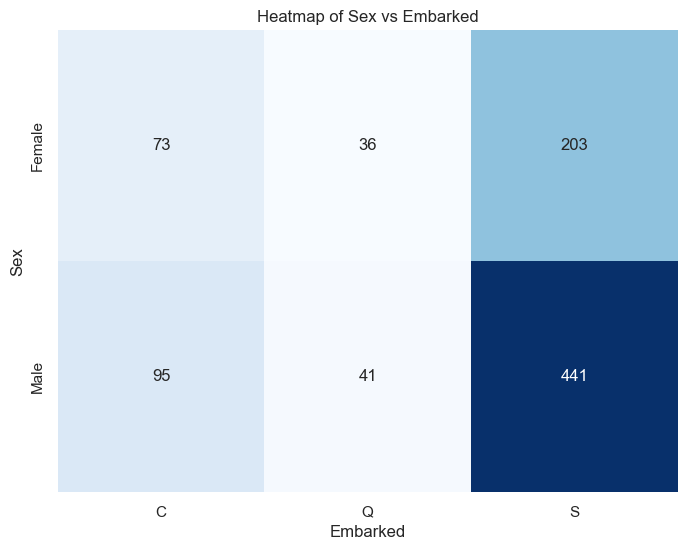

In [61]:
sns.set_theme(style="whitegrid")

#Heat map of embarked vs sex
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Heatmap of Sex vs Embarked")
plt.show()

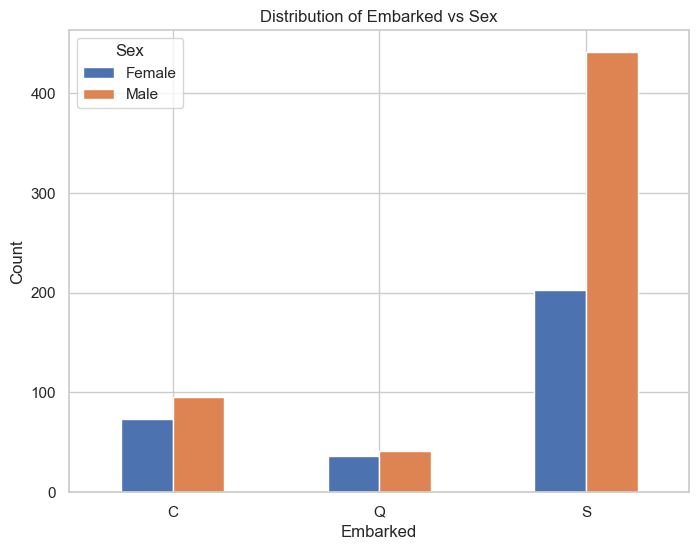

In [62]:
df = df.drop('Total', axis=1, errors='ignore')  
df = df.drop('Total', axis=0, errors='ignore') 

#Plot of Embarked vs Sex
df.T.plot(kind="bar", stacked=False, figsize=(8, 6))
plt.title("Distribution of Embarked vs Sex")
plt.ylabel("Count")
plt.xlabel("Embarked")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.show()

In [19]:
# Create a new column 'Age group' in the Titanic dataset based on the 'Age' column.
# If the age is less than 18, categorize as 'Child', otherwise as 'Adult'.
titanic['Age group'] = titanic['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

/var/folders/z9/rcltrzhx1g14qv2sc04lnml40000gn/T/ipykernel_2361/477726000.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


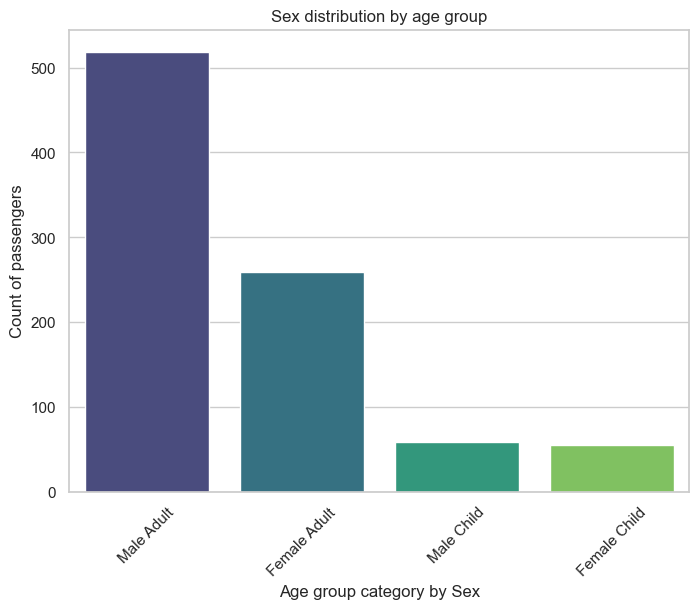

In [20]:
# Create a new column 'Group' by combining 'Sex' and 'Age group' to categorize passengers by gender and age group.
titanic['Group'] = titanic['Sex'] + " " + titanic['Age group']

# Count the occurrences of each unique group (combinations of Sex and Age group) and reset the index.
group_counts = titanic['Group'].value_counts().reset_index()

group_counts.columns = ['Age group category by Sex', 'Count of passengers']

plt.figure(figsize=(8, 6))

sns.barplot(
    data=group_counts,
    x="Age group category by Sex",
    y="Count of passengers",
    palette=sns.color_palette("viridis", len(group_counts))
)

plt.title("Sex distribution by age group")
plt.ylabel("Count of passengers")
plt.xlabel("Age group category by Sex")
plt.xticks(rotation=45)

plt.show()

The from the plot we can deduce the following:
1. Adult males made up the largest group with approximately 500 passengers, significantly outnumbering all other demographic groups.

2. Adult females were the second largest group with about 250 passengers, roughly half the number of adult males.

3. Children (both male and female) represented a much smaller portion of the passengers, with each group having around 50 passengers.

4. The imbalanced gender ratio among adults (roughly 2:1 male to female) is notable and could reflect the social and travel patterns of the early 1900s.

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group,Group
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,BMOH,S,Adult,Male Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Female Adult
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,HML,S,Adult,Female Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S,Adult,Female Adult
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,AMWH,S,Adult,Male Adult


In [22]:
# Rename Pclass to Passenger Class
titanic.rename(columns={'Pclass': 'Passenger Class'}, inplace=True)

In [23]:
titanic.head()

,PassengerId,Survived,Passenger Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group,Group
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,BMOH,S,Adult,Male Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Female Adult
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,HML,S,Adult,Female Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S,Adult,Female Adult
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,AMWH,S,Adult,Male Adult


In [24]:
# Group the Titanic dataset by 'Sex' and calculate the mean survival rate for each gender.
# This gives the proportion of survivors within each sex category.

titanic.groupby('Sex')['Survived'].mean()

Sex
Female    0.742038
Male      0.188908
Name: Survived, dtype: float64

Insight:

	•	Female survival rate: 74.2% of female passengers survived the Titanic disaster.
	•	Male survival rate: Only 18.9% of male passengers survived.

This shows a significant difference in survival rates between females and males, likely due to factors such as “women and children first” during the evacuation.

In [25]:
# Group 'Passenger Class' and 'Sex', and calculate mean of 'Fare'.
# This shows the average fare paid by passengers based on their class and gender.

titanic.groupby(['Passenger Class', 'Sex'])['Fare'].mean()

Passenger Class  Sex   
1                Female    106.125798
                 Male       67.226127
2                Female     21.970121
                 Male       19.741782
3                Female     16.118810
                 Male       12.661633
Name: Fare, dtype: float64

Insight:

	•	Passenger Class 1 (First Class):
	•	Females paid an average fare of 106.13, while males paid 67.23.
	•	Passenger Class 2 (Second Class):
	•	Females paid an average fare of 21.97, while males paid 19.74.
	•	Passenger Class 3 (Third Class):
	•	Females paid an average fare of 16.12, while males paid 12.66.

The data shows that, generally, females paid higher fares than males within each class, possibly due to differences in ticket pricing or the representation of passengers (e.g., family groups, special accommodations). Also, fares decrease with lower passenger class.

In [26]:
# count unique value in columns
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [27]:
#calculate correlation
titanic.corr(numeric_only=True)

,PassengerId,Survived,Passenger Class,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Passenger Class,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [28]:
# sorting and indexing
titanic.sort_values('Age', ascending=True)

,PassengerId,Survived,Passenger Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group,Group
803,804,1,3,"Thomas, Master. Assad Alexander",Male,0.42,0,1,2625,8.5167,TMAA,C,Child,Male Child
755,756,1,2,"Hamalainen, Master. Viljo",Male,0.67,1,1,250649,14.5000,HMV,S,Child,Male Child
644,645,1,3,"Baclini, Miss. Eugenie",Female,0.75,2,1,2666,19.2583,BME,C,Child,Female Child
469,470,1,3,"Baclini, Miss. Helene Barbara",Female,0.75,2,1,2666,19.2583,BMHB,C,Child,Female Child
831,832,1,2,"Richards, Master. George Sibley",Male,0.83,1,1,29106,18.7500,RMGS,S,Child,Male Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,0,3,"Connors, Mr. Patrick",Male,70.50,0,0,370369,7.7500,CMP,Q,Adult,Male Adult
96,97,0,1,"Goldschmidt, Mr. George B",Male,71.00,0,0,PC 17754,34.6542,A5,C,Adult,Male Adult
493,494,0,1,"Artagaveytia, Mr. Ramon",Male,71.00,0,0,PC 17609,49.5042,AMR,C,Adult,Male Adult
851,852,0,3,"Svensson, Mr. Johan",Male,74.00,0,0,347060,7.7750,SMJ,S,Adult,Male Adult


In [29]:
# reset index
titanic.reset_index(drop=True, inplace=True)

In [30]:
# normalize count of passengers who survived the incident
titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Insight:

	•	Survived (1): 38.38% of passengers survived the Titanic disaster.
	•	Not Survived (0): 61.62% of passengers did not survive.

This shows that a higher proportion of passengers did not survive, which reflects the overall death toll of the Titanic tragedy.

In [31]:
# Create a new column 'FareRange' that categorizes passengers' fare into 3 ranges:
titanic['FareRnge'] = pd.cut(titanic['Fare'], bins=[0,10,50,100], labels=['Low', 'Medium', 'High'])

In [32]:
titanic.head()

,PassengerId,Survived,Passenger Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group,Group,FareRnge
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,BMOH,S,Adult,Male Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Female Adult,High
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,HML,S,Adult,Female Adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S,Adult,Female Adult,High
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,AMWH,S,Adult,Male Adult,Low


In [33]:
titanic.to_csv('processed_titanic.csv', index=False)

In [34]:
# cross-tabulation of survivors (1) and non-survivors (0)
# based on 'Sex' (Female and Male) in the Titanic dataset.

pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
Female,81,233
Male,468,109


Insight:

	Female passengers:
    
	•	81 females did not survive (0).
	•	233 females survived (1).
    
	Male passengers:
    
	•	468 males did not survive (0).
	•	109 males survived (1).

This shows a clear gender disparity in survival rates, with a higher proportion of females surviving compared to males, which could be due to the “women and children first” policy during evacuations.

In [63]:
pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')

Survived,0,1
Sex,,
Female,0.257962,0.742038
Male,0.811092,0.188908


In [64]:
pivot_age =titanic.pivot_table(index='Sex', columns='Passenger Class', values='Age', aggfunc='count')
print(pivot_age)

Passenger Class    1    2    3
Sex                           
Female            94   76  144
Male             122  108  347


In [65]:
pivot = titanic.pivot_table(index='Sex', columns='Passenger Class', values='Survived', aggfunc='mean')
print(pivot)

Passenger Class         1         2         3
Sex                                          
Female           0.968085  0.921053  0.500000
Male             0.368852  0.157407  0.135447


In [66]:
titanic.groupby(['Passenger Class']).Fare.agg([min, max])

/var/folders/z9/rcltrzhx1g14qv2sc04lnml40000gn/T/ipykernel_2361/1433579784.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  titanic.groupby(['Passenger Class']).Fare.agg([min, max])
/var/folders/z9/rcltrzhx1g14qv2sc04lnml40000gn/T/ipykernel_2361/1433579784.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic.groupby(['Passenger Class']).Fare.agg([min, max])


,min,max
Passenger Class,,
1,0.0,512.3292
2,0.0,73.5000
3,0.0,69.5500


In [68]:
# apply a 25% reduction (removes tax) to each value in the 'Fare' column.

def vat(tax):
    return tax.apply(lambda x: x*.75)

print(vat(titanic['Fare']))

0       5.437500
1      53.462475
2       5.943750
3      39.825000
4       6.037500
         ...    
886     9.750000
887    22.500000
888    17.587500
889    22.500000
890     5.812500
Name: Fare, Length: 891, dtype: float64


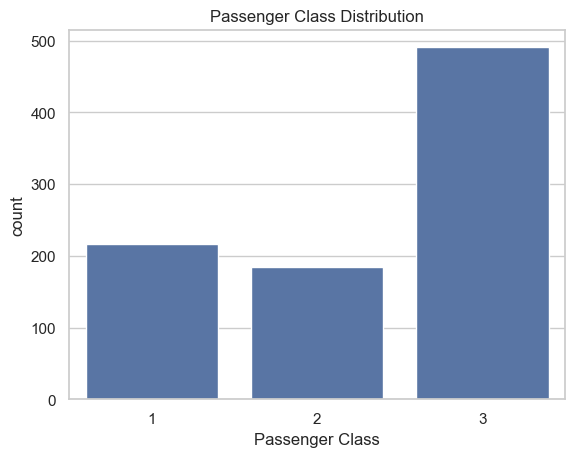

In [70]:
# visualize the distribution of passengers across the 'Passenger Class'.
sns.countplot(titanic, x="Passenger Class")
plt.title("Passenger Class Distribution")
plt.show()

This bar plot reveals a striking class disparity among Titanic passengers. Third class (Class 3) had nearly 500 passengers, more than double the number in first class (approximately 220 passengers) and almost triple those in second class (about 180 passengers). This distribution reflects the socioeconomic reality of trans-Atlantic travel in 1912, where the majority of passengers were immigrants and working-class people traveling in third class/steerage, while the wealthy minority occupied the more expensive first-class accommodations. The fact that third class was so heavily populated would later prove tragically significant, as these passengers faced higher mortality rates during the disaster, partly due to their location in the lower decks and limited access to lifeboats.

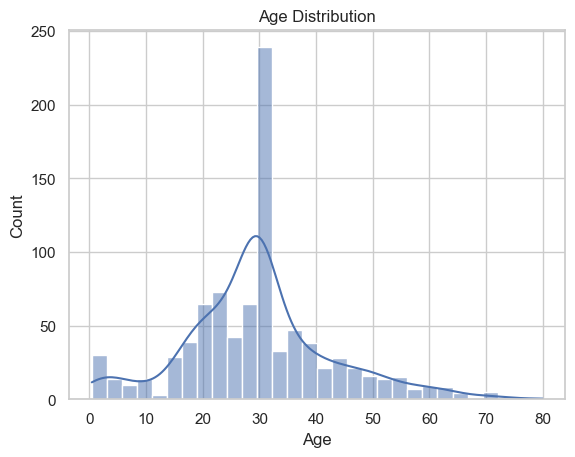

In [42]:
sns.histplot(titanic["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

The age distribution shows that the majority of Titanic passengers were young adults, with a clear peak around age 30. There's also a smaller cluster of children under 10, but the passenger count drops significantly for people over 50. 

This suggests that the Titanic was primarily carrying working-age individuals, possibly immigrants seeking opportunities in America.

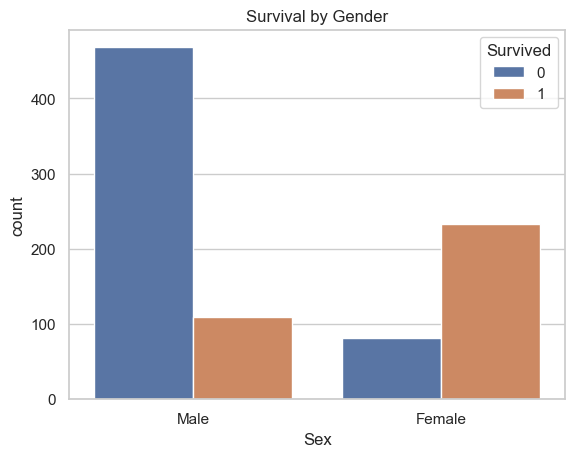

In [43]:
sns.countplot(titanic, x="Sex", hue="Survived")
plt.title("Survival by Gender")
plt.show()

Males had very poor survival rates, with over 400 deaths compared to around 100 survivors

Females had much better survival rates, with about 230 survivors compared to only 80 deaths

This reflects the "women and children first" protocol during the evacuation, as well as the location of different gender accommodations on the ship.

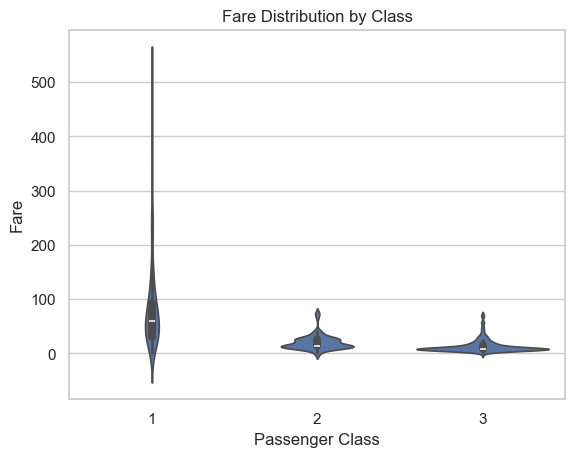

In [44]:
sns.violinplot(data=titanic, x="Passenger Class", y="Fare")
plt.title("Fare Distribution by Class")
plt.show()

The plot shows dramatic fare differences between classes:

First class (1) had the highest fares and widest variation, with some passengers paying extremely high amounts

Second class (2) had moderate fares with less variation

Third class (3) had the lowest fares and least variation, clustering tightly at the bottom

This visualizes the stark economic segregation aboard the ship.

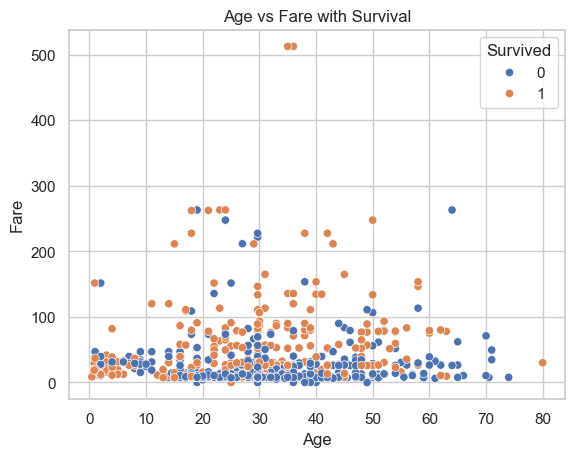

In [45]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Survived")
plt.title("Age vs Fare with Survival")
plt.show()

The data shows:

The highest fares (around 500) were paid by middle-aged passengers (around age 40)

There appears to be better survival rates (orange dots) among higher-fare passengers

The majority of passengers paid lower fares (under 100), regardless of age

There's a wide spread of fares in the 20-40 age range, suggesting varying economic classes among young adults

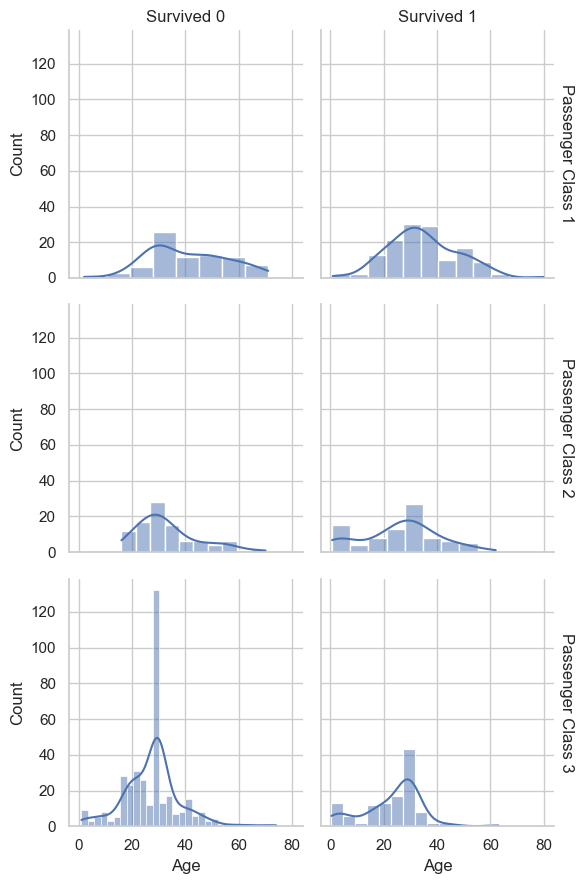

In [46]:
g = sns.FacetGrid(titanic, col="Survived", row="Passenger Class", margin_titles=True)
g.map(sns.histplot, "Age", kde=True)
g.set_titles(col_template="Survived {col_name}", row_template="Passenger Class {row_name}")
plt.show()

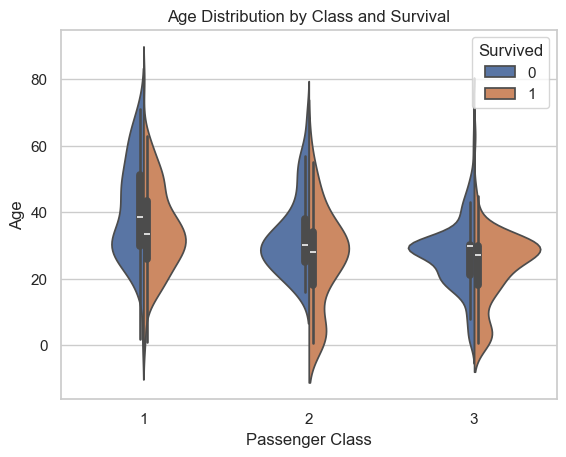

In [47]:
# visualization of class by age and survived
sns.violinplot(titanic, x="Passenger Class", y="Age", hue="Survived", split=True)
plt.title("Age Distribution by Class and Survival")
plt.show()

This plot reveals several interesting patterns about age distribution, class, and survival on the Titanic:

1. First Class (1):
- Had the widest age spread, with passengers ranging from young children to elderly
- Shows a higher concentration of middle-aged passengers (around 30-40 years)
- The survival distribution (orange) appears more balanced with non-survival (blue), suggesting better survival rates for first-class passengers

2. Second Class (2):
- Shows a slightly younger average age than first class
- Has a more concentrated age distribution, focusing on young to middle-aged adults
- Like first class, shows some balance between survivors and non-survivors, though perhaps slightly less favorable

3. Third Class (3):
- Shows the youngest average age of all classes
- Has a strong concentration of passengers in their 20s and early 30s
- The wider blue (non-survival) portion suggests poorer survival rates compared to other classes
- This likely reflects the demographic of immigrants seeking new opportunities in America

Across all classes, there's a notable pattern where younger passengers seem to have had better survival rates (larger orange sections in the lower age ranges), while the blue (non-survival) sections tend to be larger in the higher age ranges. This could reflect both the "women and children first" protocol and the physical challenges older passengers faced in reaching the lifeboats.

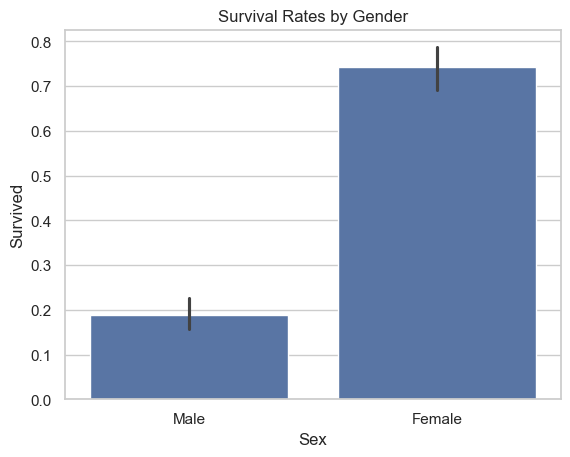

In [48]:
def bar_charts(data, row_variable, column_variable, title):
    sns.barplot(data, x=row_variable, y=column_variable)
    plt.title(title)
    plt.show()

bar_charts(titanic, 'Sex', 'Survived', 'Survival Rates by Gender')

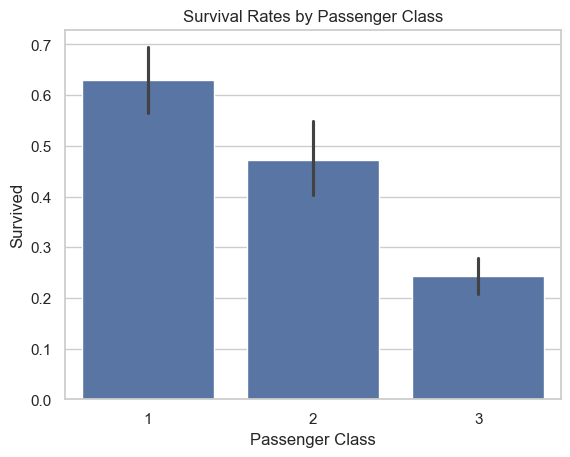

In [49]:
bar_charts(titanic, 'Passenger Class', 'Survived', 'Survival Rates by Passenger Class')

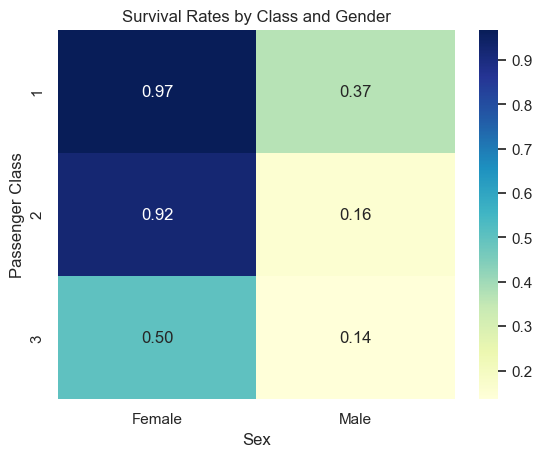

In [50]:
survival_pivot = titanic.pivot_table("Survived", index="Passenger Class", columns="Sex")
sns.heatmap(survival_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Survival Rates by Class and Gender")
plt.show()

In [51]:
survival_pivot

Sex,Female,Male
Passenger Class,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


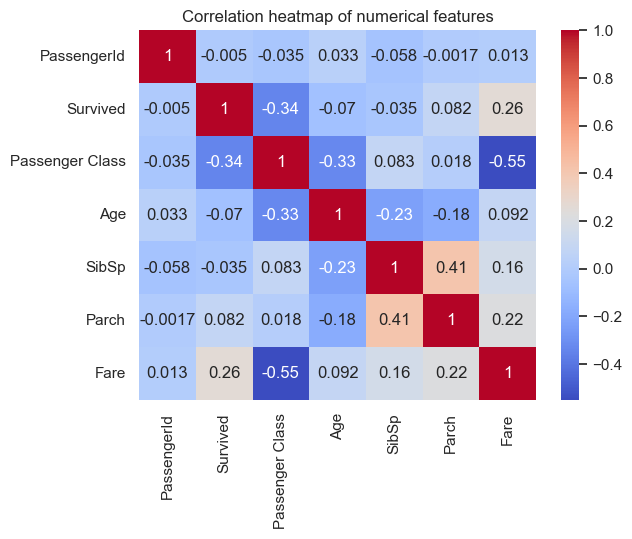

In [71]:
# correlation heatmap.
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation heatmap of numerical features")
plt.show()

In [72]:
titanic.to_csv('processed_titanic.csv', index=False)

In [73]:
titanic.head()

,PassengerId,Survived,Passenger Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group,Group,FareRnge
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,BMOH,S,Adult,Male Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Female Adult,High
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,HML,S,Adult,Female Adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S,Adult,Female Adult,High
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,AMWH,S,Adult,Male Adult,Low


In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Passenger Class  891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Cabin            891 non-null    object  
 11  Embarked         889 non-null    object  
 12  Age group        891 non-null    object  
 13  Group            891 non-null    object  
 14  FareRnge         823 non-null    category
dtypes: category(1), float64(2), int64(5), object(7)
memory usage: 98.6+ KB


In [75]:
# Feature selection
X = titanic[['Passenger Class', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic['Survived']

X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

# One-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Passenger Class', 'Age', 'SibSp', 'Parch', 'Fare']),
        ('cat', OneHotEncoder(), ['Sex', 'Embarked'])
    ])

X = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/z9/rcltrzhx1g14qv2sc04lnml40000gn/T/ipykernel_2361/211163974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])


In [76]:
X_train[0]

array([-1.56610693,  1.21594664, -0.4745452 , -0.47367361, -0.07458307,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ])

In [77]:
# !pip install tensorflow

In [78]:
model = Sequential()
model.add(Dense(units = 32, input_shape = (10,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))



model.summary()


model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])
model.fit(X_train, y_train, batch_size = 32, verbose = 2, epochs = 50)


predict = model.predict(X_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(predict)


train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

/Users/stevendaniel/Desktop/BOOT_CAMP_2024/Developers_Foundry/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,785 (85.10 KB)

 Trainable params: 21,657 (84.60 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50
23/23 - 1s - 40ms/step - acc: 0.6447 - loss: 0.6649
Epoch 2/50
23/23 - 0s - 2ms/step - acc: 0.7500 - loss: 0.5457
Epoch 3/50
23/23 - 0s - 2ms/step - acc: 0.7949 - loss: 0.4961
Epoch 4/50
23/23 - 0s - 2ms/step - acc: 0.8062 - loss: 0.4645
Epoch 5/50
23/23 - 0s - 2ms/step - acc: 0.8132 - loss: 0.4482
Epoch 6/50
23/23 - 0s - 2ms/step - acc: 0.8357 - loss: 0.4145
Epoch 7/50
23/23 - 0s - 2ms/step - acc: 0.8244 - loss: 0.4321
Epoch 8/50
23/23 - 0s - 2ms/step - acc: 0.8090 - loss: 0.4414
Epoch 9/50
23/23 - 0s - 2ms/step - acc: 0.8272 - loss: 0.4110
Epoch 10/50
23/23 - 0s - 2ms/step - acc: 0.8497 - loss: 0.3886
Epoch 11/50
23/23 - 0s - 2ms/step - acc: 0.8357 - loss: 0.4068
Epoch 12/50
23/23 - 0s - 2ms/step - acc: 0.8244 - loss: 0.4100
Epoch 13/50
23/23 - 0s - 2ms/step - acc: 0.8441 - loss: 0.3891
Epoch 14/50
23/23 - 0s - 2ms/step - acc: 0.8385 - loss: 0.3995
Epoch 15/50
23/23 - 0s - 2ms/step - acc: 0.8371 - loss: 0.3889
Epoch 16/50
23/23 - 0s - 2ms/step - acc: 0.8329 - loss: 0.3895


In [ ]:
# pip install xgboost

In [79]:
# Random Forest Classifier
randomForest_model = RandomForestClassifier(random_state=42)
randomForest_model.fit(X_train, y_train)

# Random Forest Training accuracy 
print(f"========== Random forest Model Accuracy:================")
trainig_preds = randomForest_model.predict(X_train)
training_accuracy = accuracy_score(y_train, trainig_preds)
print(f'Training Accuracy: {training_accuracy * 100:.2f}%')

# Random Forest Test accuracy 
test_preds = randomForest_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f'Test Accuracy: {test_accuracy * 100:.2f}% \n')


# XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# XGBoost Training accuracy
print(f"========== XGBoost Model Accuracy:================")
training_preds = xgb_model.predict(X_train)
training_accuracy = accuracy_score(y_train, training_preds)
print(f'Training Accuracy: {training_accuracy * 100:.2f}%')

# XGBoost Test accuracy
test_preds = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

========== Random forest Model Accuracy:================
Training Accuracy: 98.03%
Test Accuracy: 82.12% 

========== XGBoost Model Accuracy:================
Training Accuracy: 96.21%
Test Accuracy: 81.01%


## Insight:

1. The neural network model performed well on both training and test datasets, with a slight drop in accuracy on the test set, suggesting some degree of overfitting.
		
2. The Random Forest model achieved high training accuracy but showed a relatively larger difference in test accuracy compared to training, indicating overfitting. However, it still performed better on the test set than the neural network.

3. XGBoost exhibited strong training accuracy, but like the neural network, it experienced some overfitting, with a significant difference between training and test accuracy.

Conclusion:

1. Random Forest performed the best among the three models in terms of test accuracy (82.12%). 

2. Neural Network and XGBoost both had similar test accuracies (81.01%) but showed slightly more overfitting compared to Random Forest.

Thus, Random Forest seems to be the most robust model for this dataset, striking a balance between training and test performance, while Neural Networks and XGBoost models may need further tuning to improve generalization and reduce overfitting.